Triples [ 0  3  6  9 12 15 18 21 24 27] ...
Signs [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] ...
Signs [-1.  1.  1. -1.  1.  1. -1.  1.  1. -1.] ...
Masked logs [-- 14.970818190308929 15.830413578506539 -- 13.458835614025542
 15.319587954740548 -- 15.648092021712584 13.864300722133706 --] ...
Inside [3750000.0 3175000.0 7500000.0 3000000.0 700000.0 4500000.0 3000000.0
 6250000.0 1050000.0 4600000.0] ...


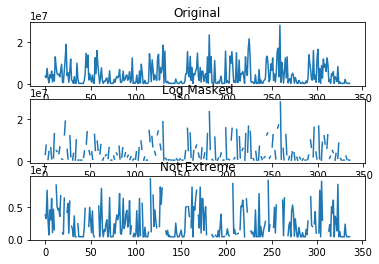

In [1]:
### A masked array from the numpy.ma subpackage is a subclass 
# of ndarray with a mask

# A masked value is like a NULL value in relational databases
# and programming. All operations with a masked value deliver
# a masked value.

import numpy as np
# from matplotlib.finance import quotes_historical_yahoo
from datetime import date
import sys
import matplotlib.pyplot as plt

salary = np.loadtxt("MLB2008.csv", delimiter=',', usecols=(1,), \
                    skiprows=1, unpack=True)
triples = np.arange(0, len(salary), 3)
print "Triples", triples[:10], "..."

signs = np.ones(len(salary))
print "Signs", signs[:10], "..."

signs[triples] = -1
print "Signs", signs[:10], "..."

ma_log = np.ma.log(salary * signs)
print "Masked logs", ma_log[:10], "..."

dev = salary.std()
avg = salary.mean()
inside = np.ma.masked_outside(salary, avg - dev, avg + dev)
print "Inside", inside[:10], "..."

plt.subplot(311)
plt.title("Original")
plt.plot(salary)

plt.subplot(312)
plt.title("Log Masked")
plt.plot(np.exp(ma_log))

plt.subplot(313)
plt.title("Not Extreme")
plt.plot(inside)

plt.show()
